In [1]:
from img_doc.document import Document
import matplotlib.pyplot as plt

2024-03-11 13:43:29.503783: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-11 13:43:29.530623: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-11 13:43:29.530651: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-11 13:43:29.531317: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-11 13:43:29.535374: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-11 13:43:29.535718: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [2]:
doc = Document()
doc.set_from_path("img/1.jpg")

In [3]:
i_page = 0
page = doc.pages[i_page]

page.extract_paragraphs(method="words2paragraph")

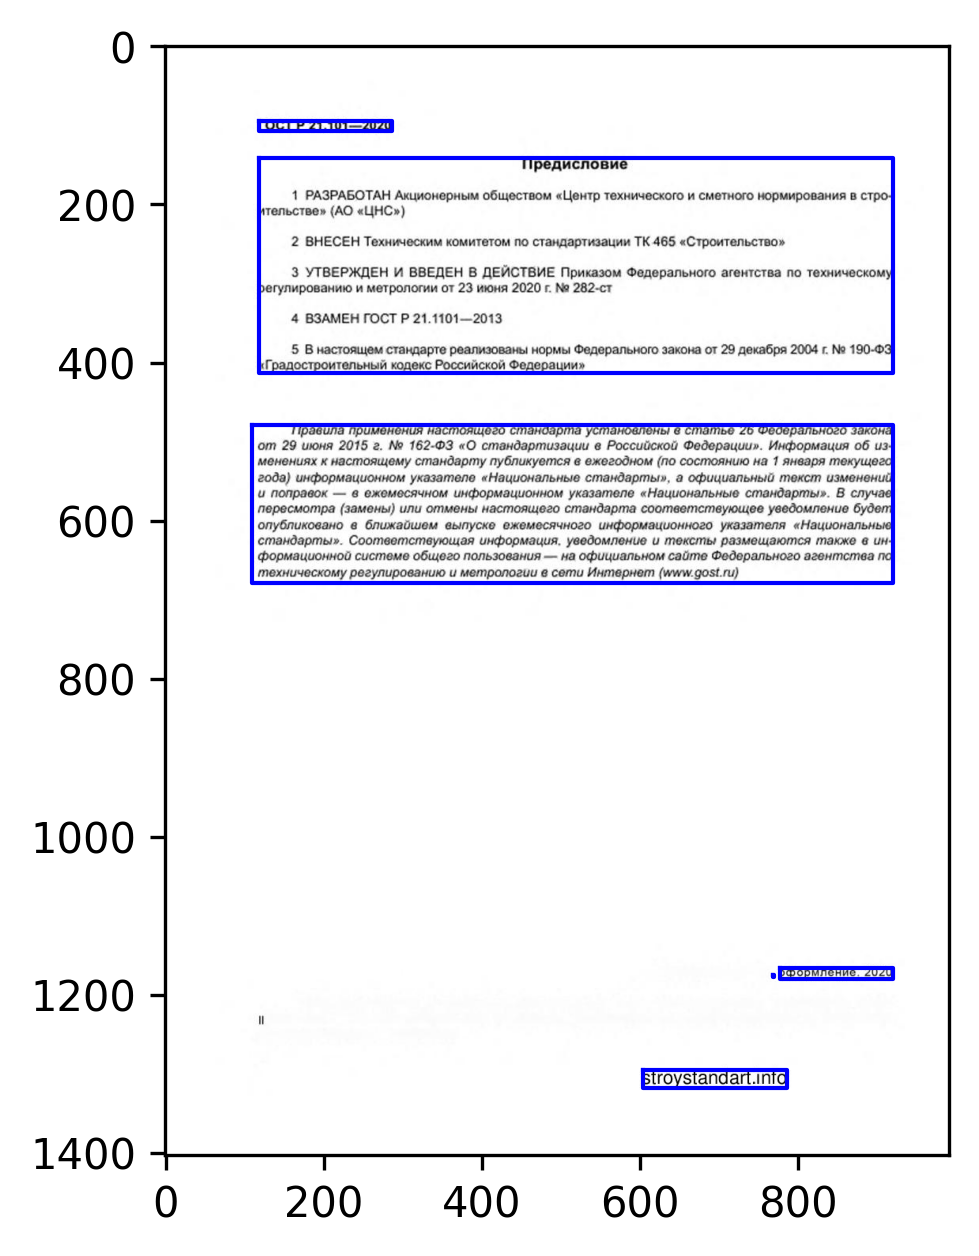

In [4]:
plt.figure(dpi=300)

page.image.plot()
for paragraph in page.paragraphs:
    paragraph.segment.plot()

In [10]:
from img_doc.document import Block
b = Block(page.paragraphs[1].segment.get_segment_2p())
b.words = page.paragraphs[1].words

In [11]:
from img_doc.document.page.extractors.block_extractors import BaseRandomWalkClassificator, BaseRandomDeepNodeClassificator

In [17]:
brdc = BaseRandomDeepNodeClassificator({"properties":["many_dist", "many_angle", "place_in_block", "height", "bold", "hist_dist", "hist_ang"],
                                        "count_node":1, 
                                        "deep":2 })

In [18]:
vec = brdc.get_block_vec(b)
len(vec)

274

In [9]:
rndcls = BaseRandomWalkClassificator(conf={"properties": ["hist_ang"], "count_step":0})
vec = rndcls.get_block_vec(b)
vec

array([0.47916667, 0.11458333, 0.08854167, 0.125     , 0.08333333,
       0.05729167, 0.13020833, 0.07291667, 0.03125   , 0.00520833,
       1.        ])

In [10]:
import numpy as np

In [18]:
np.histogram([1, 2, 3, 10, 30, 30,30,30,30,30, 30, 30,30,30,30,30], bins=11,)[0]

array([ 3,  0,  0,  1,  0,  0,  0,  0,  0,  0, 12])